In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Why Seaborn?
- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

### Seaborn Roadmap
Types of Function
- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

In [3]:
tips = sns.load_dataset('tips')

### 1. Relational Plot
- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

<Axes: xlabel='total_bill', ylabel='tip'>

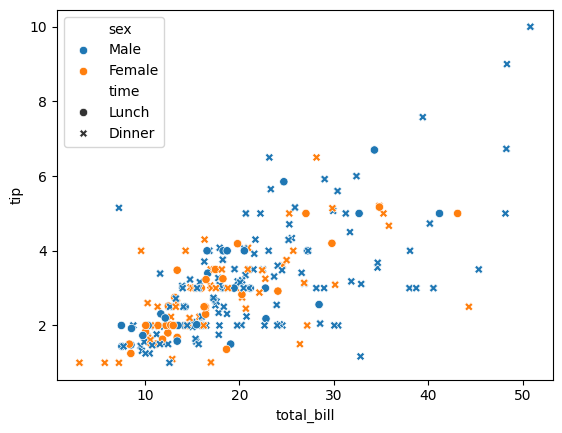

In [4]:
# Using Figure Level Function
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')

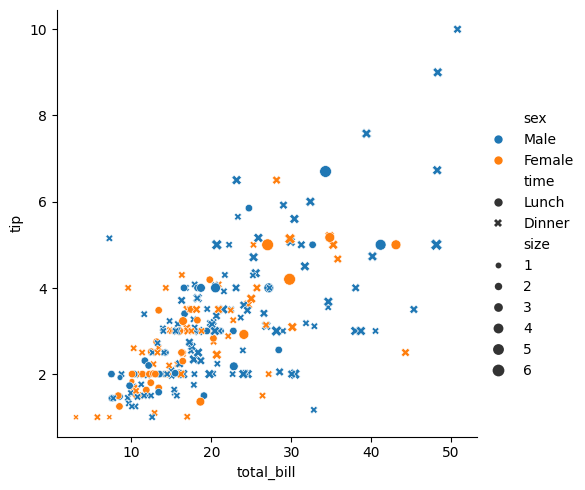

In [5]:
# Using axes level function --> Square shape
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='sex', style='time', size='size')

In [6]:
# import dataset from plotly
gap = px.data.gapminder()
gap.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [17]:
# Life Expectancy of each year in pakistan
temp_df = gap[gap['country'] == 'Pakistan']

<Axes: xlabel='year', ylabel='lifeExp'>

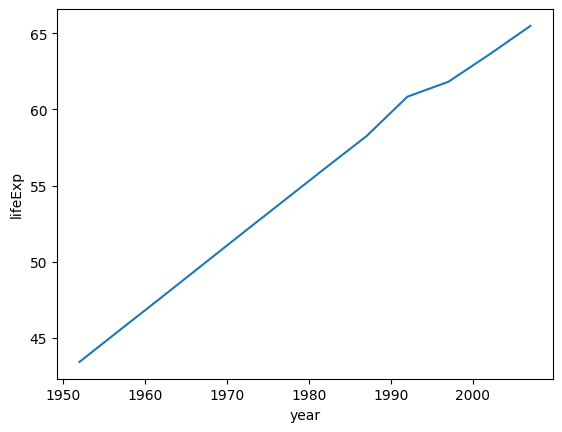

In [18]:
# Line plot
sns.lineplot(data=temp_df, x='year', y='lifeExp')

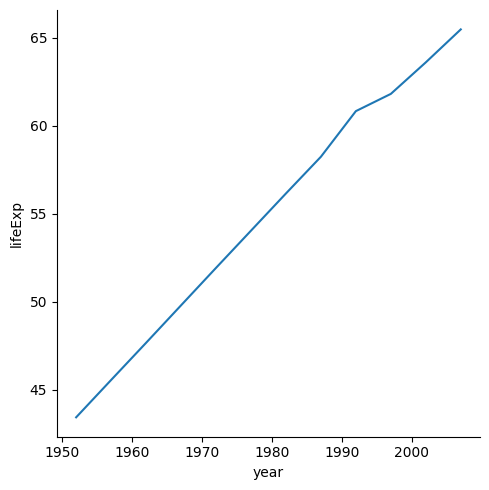

In [19]:
# Using relplot
sns.relplot(data=temp_df, x='year', y='lifeExp', kind='line')

In [22]:
# Using hue parameter plot different country lifeExp in each year
temp_df = gap[gap['country'].isin(['India','Pakistan','China'])]


<Axes: xlabel='year', ylabel='lifeExp'>

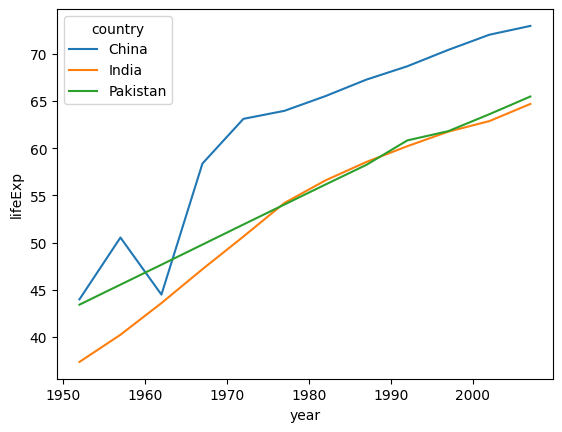

In [24]:
# Using axes level function
sns.lineplot(data=temp_df, x='year', y='lifeExp', hue='country')

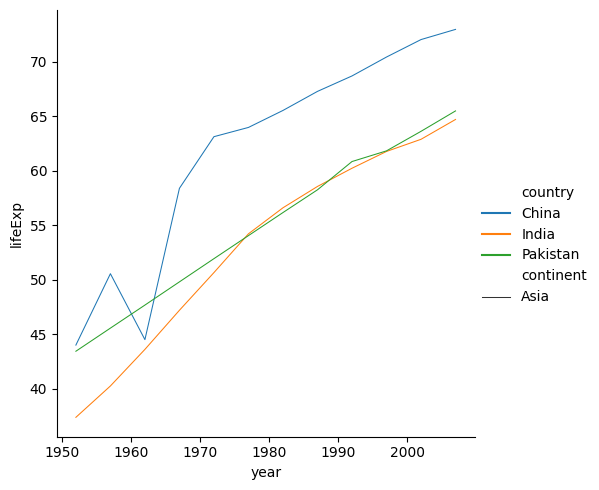

In [31]:
# Using Figure Level function
sns.relplot(data=temp_df, x='year', y='lifeExp', kind='line', hue='country', style='continent', size='continent')

In [ ]:
# facet plot ->[Means multiple plots] and can only apply on figure level function -> and work with relplot
# it will not work with scatterplot and lineplot

In [49]:
tips=sns.load_dataset('tips')

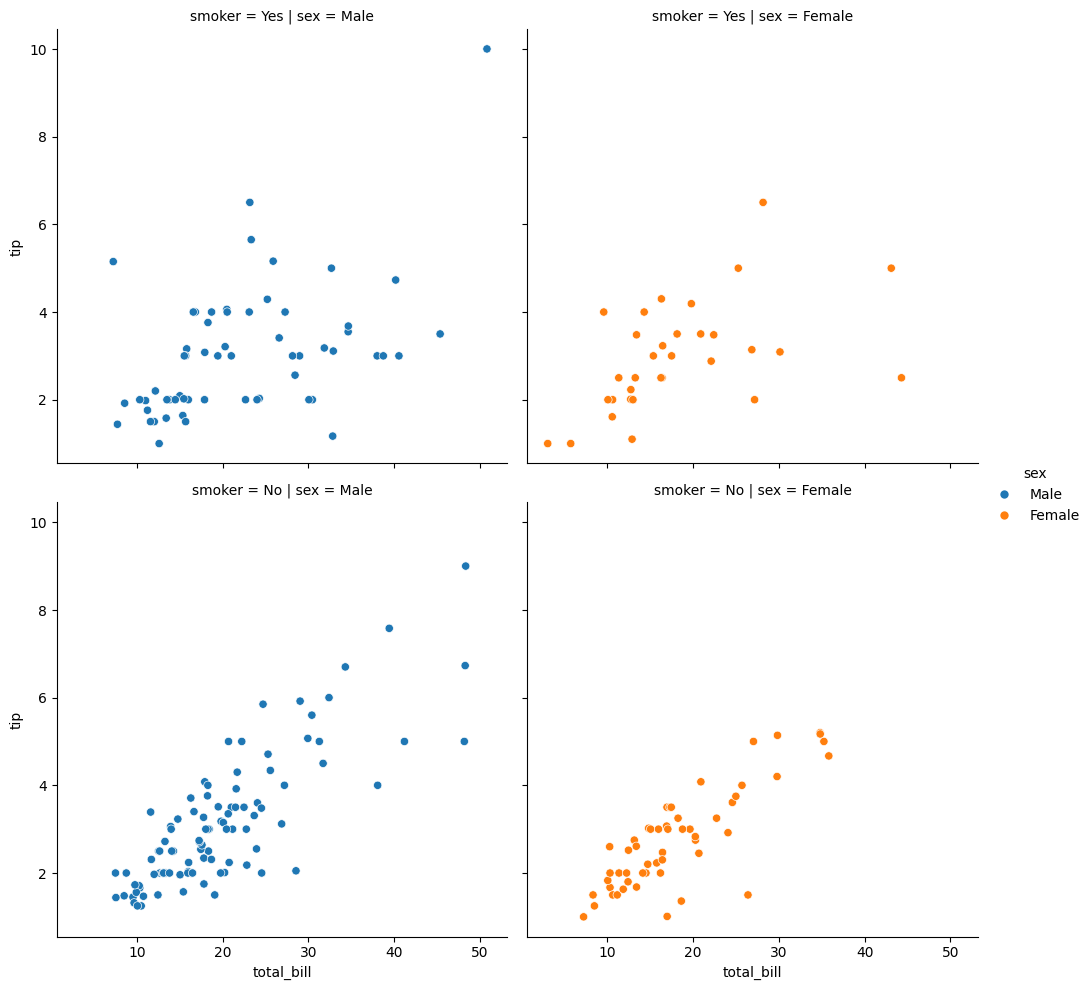

In [51]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='sex', col='sex', row='smoker')

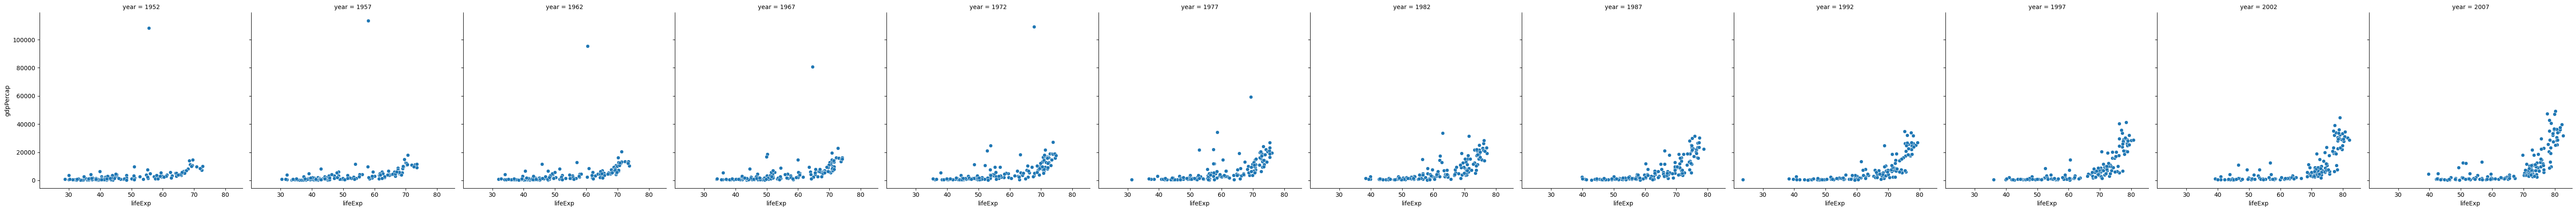

In [57]:
sns.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year')

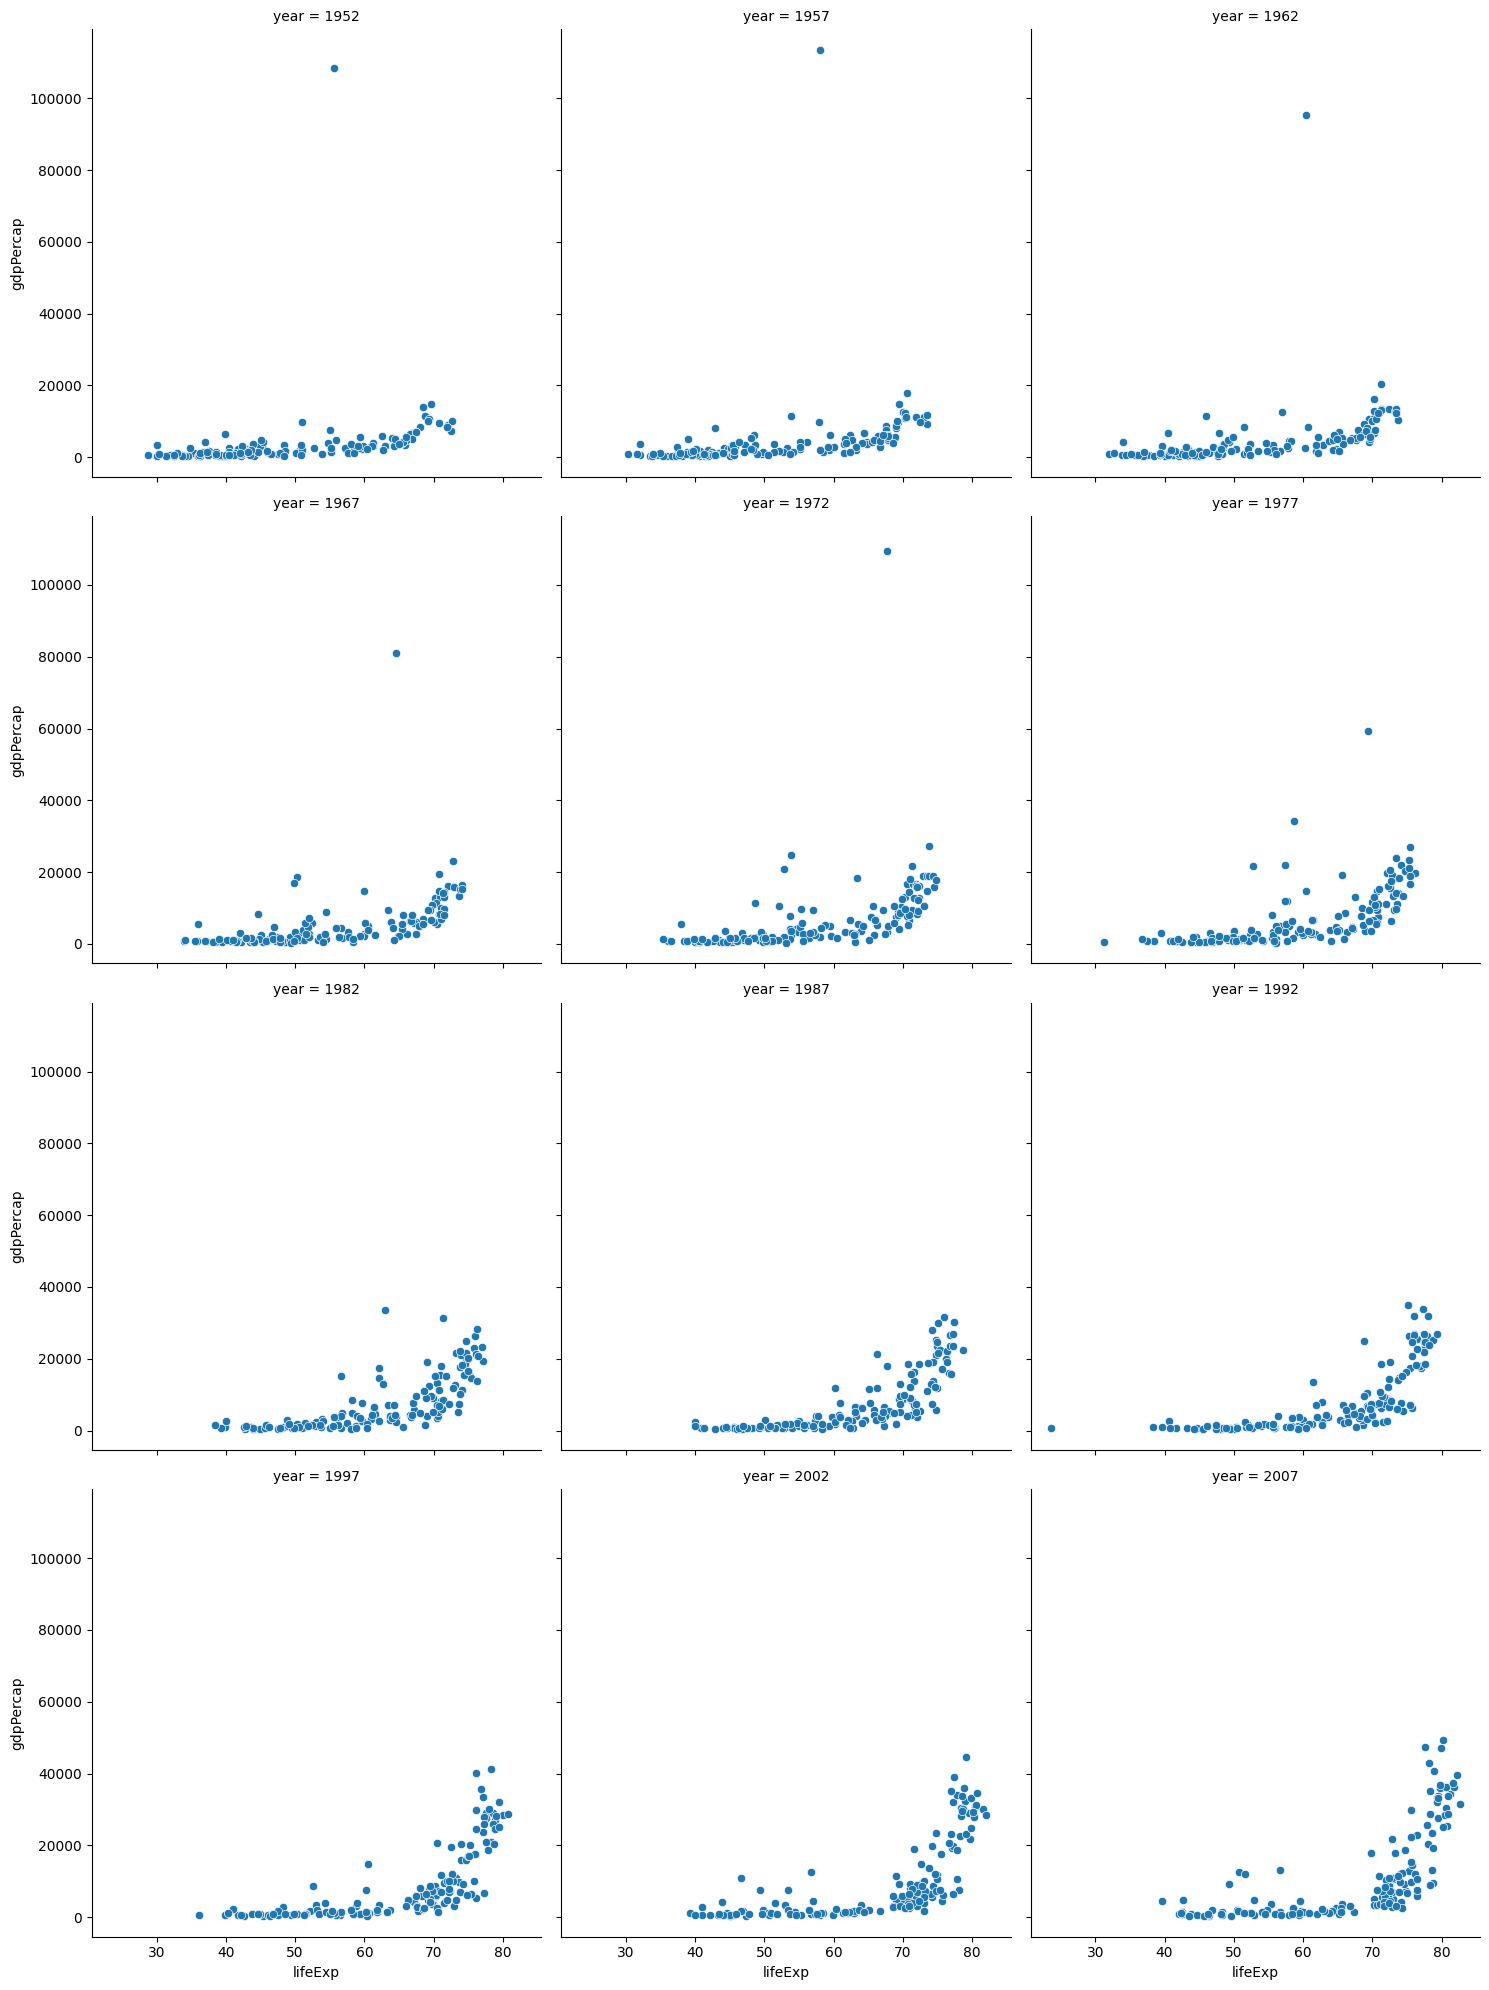

In [58]:
# col wrap :- Ager plot serf row mai destribute hai, our ham chahty hai k har row mai 3, ya 4 etc plot honi chahiye tu ham col wrap ka use karty hai
sns.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year', col_wrap=3)

### 2. Distribution Plots
- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

## Note: # To use figure level -> then write "displot"
# axes level -> histplot -> kdeplot -> rugplot

<Axes: xlabel='total_bill', ylabel='Count'>

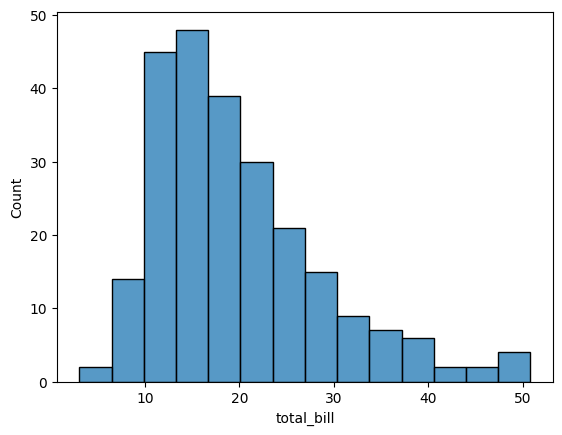

In [61]:
# Plotting univariate histogram using axes level function
sns.histplot(data=tips,x='total_bill')

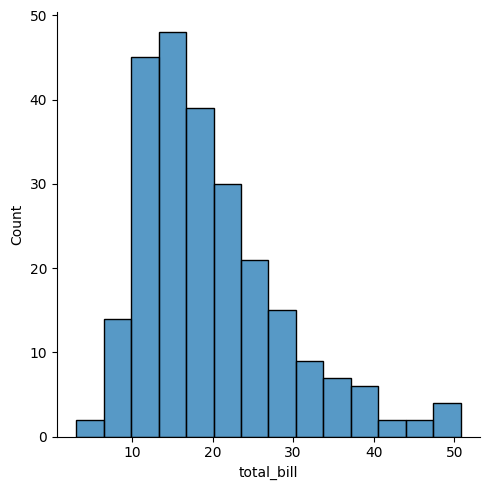

In [62]:
# Using Figure Level funtion
sns.displot(data=tips, x='total_bill', kind='hist')

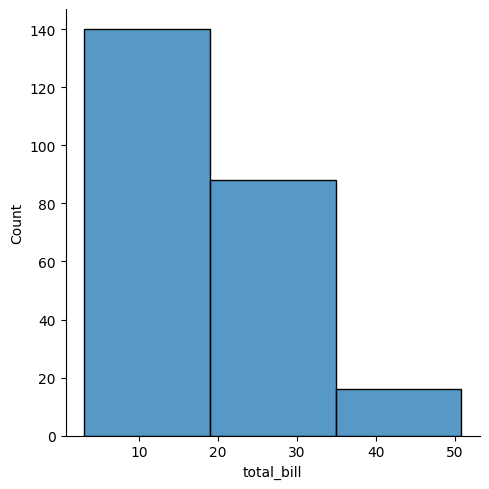

In [64]:
# We can specify the bins
sns.displot(data=tips, x='total_bill',kind='hist', bins=3)

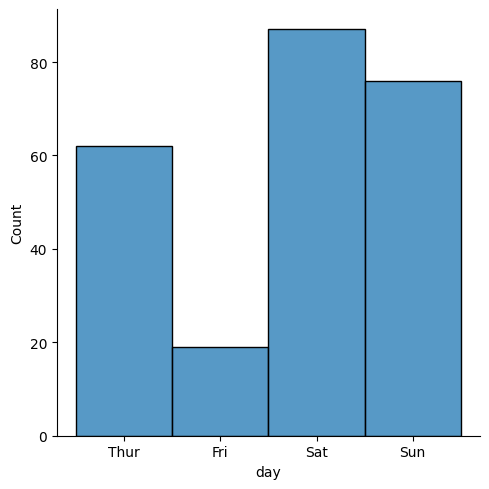

In [65]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram.
# Discrete bins are automatically set for categorical variables
sns.displot(data=tips, x='day', kind='hist')

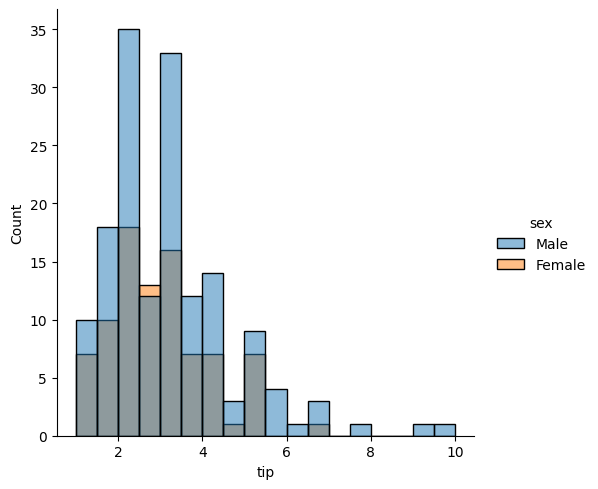

In [66]:
# hue parameter
sns.displot(data=tips, x='tip', kind='hist', hue='sex')

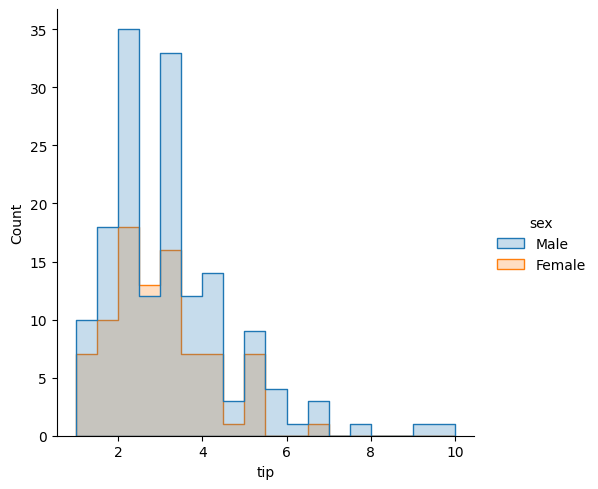

In [67]:
# element -> step
sns.displot(data=tips, x='tip', kind='hist',hue='sex',element='step')

In [68]:
titanic=sns.load_dataset('titanic')

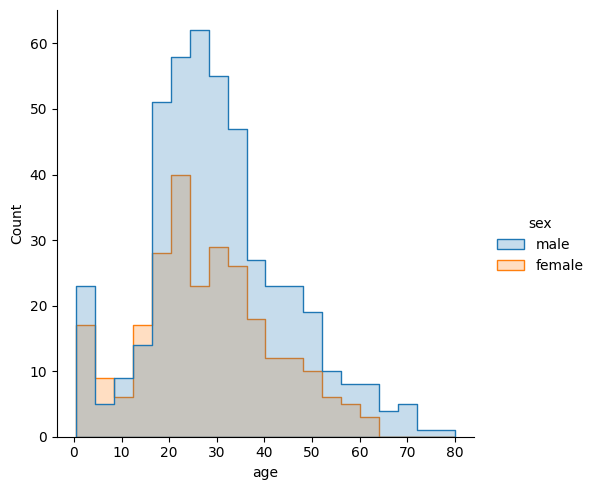

In [70]:
sns.displot(data=titanic, x='age', kind='hist', hue='sex', element='step')

# Faceting

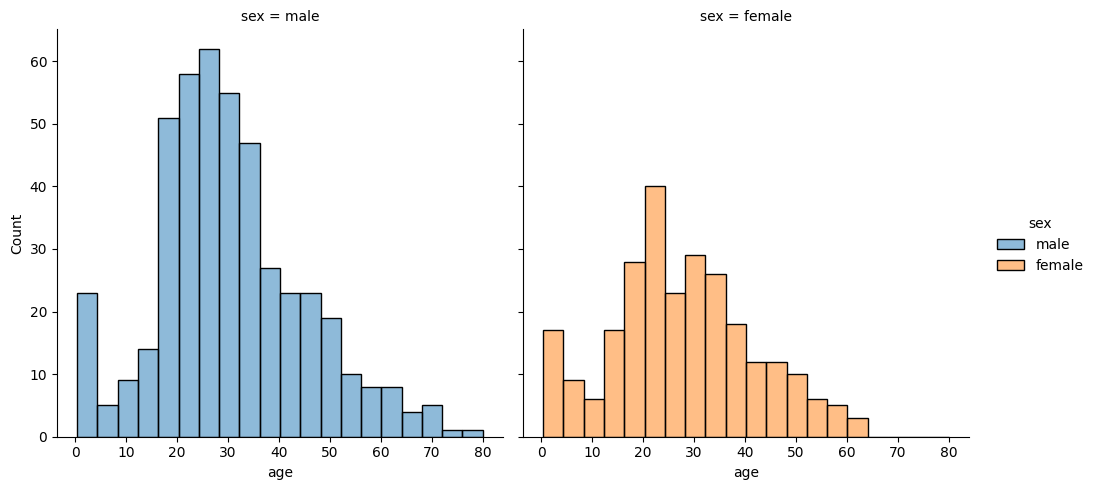

In [76]:
# faceting using col and row on figure level function -> and not work on histplot function(axes level function)
sns.displot(data=titanic, x='age', kind='hist', hue='sex', col='sex')

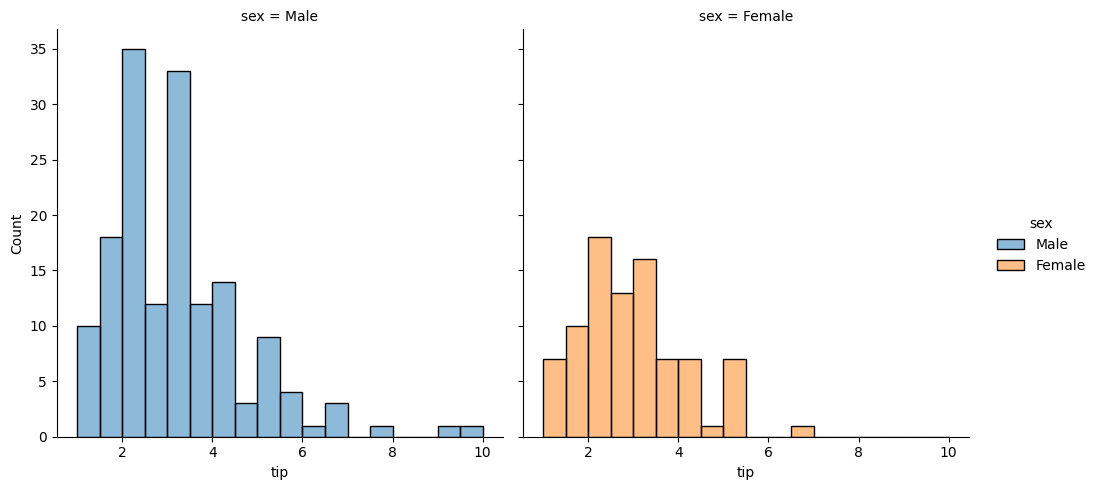

In [77]:
sns.displot(data=tips, x='tip', kind='hist', hue='sex', col='sex')

# kdeplot
#### Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate

<Axes: xlabel='tip', ylabel='Density'>

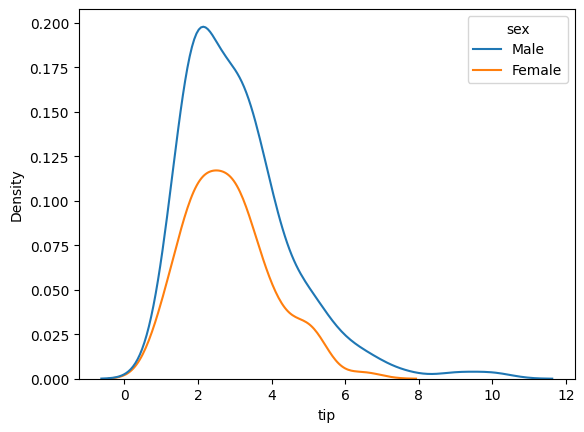

In [78]:
sns.kdeplot(data=tips, x='tip', hue='sex')

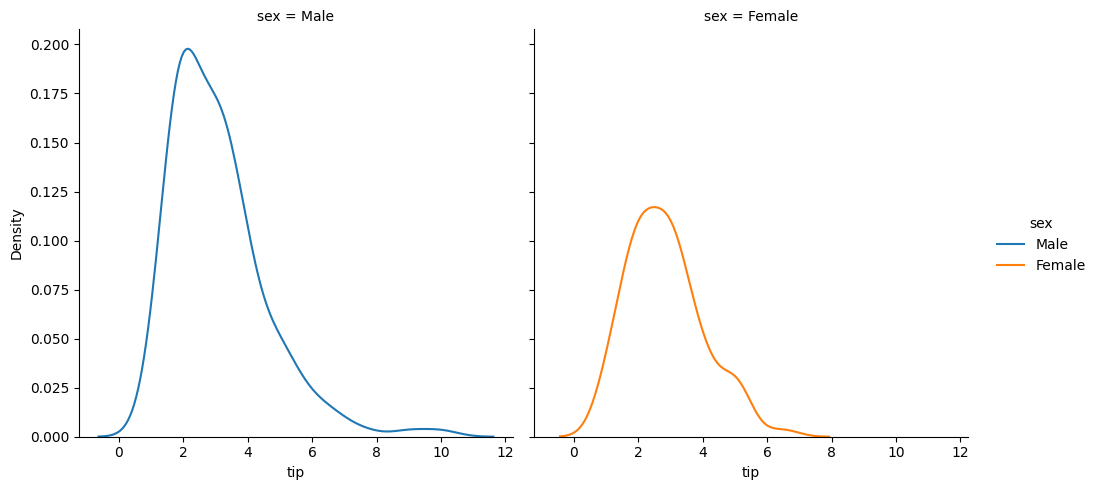

In [80]:
sns.displot(data=tips, x='tip', kind='kde', hue='sex', col='sex')

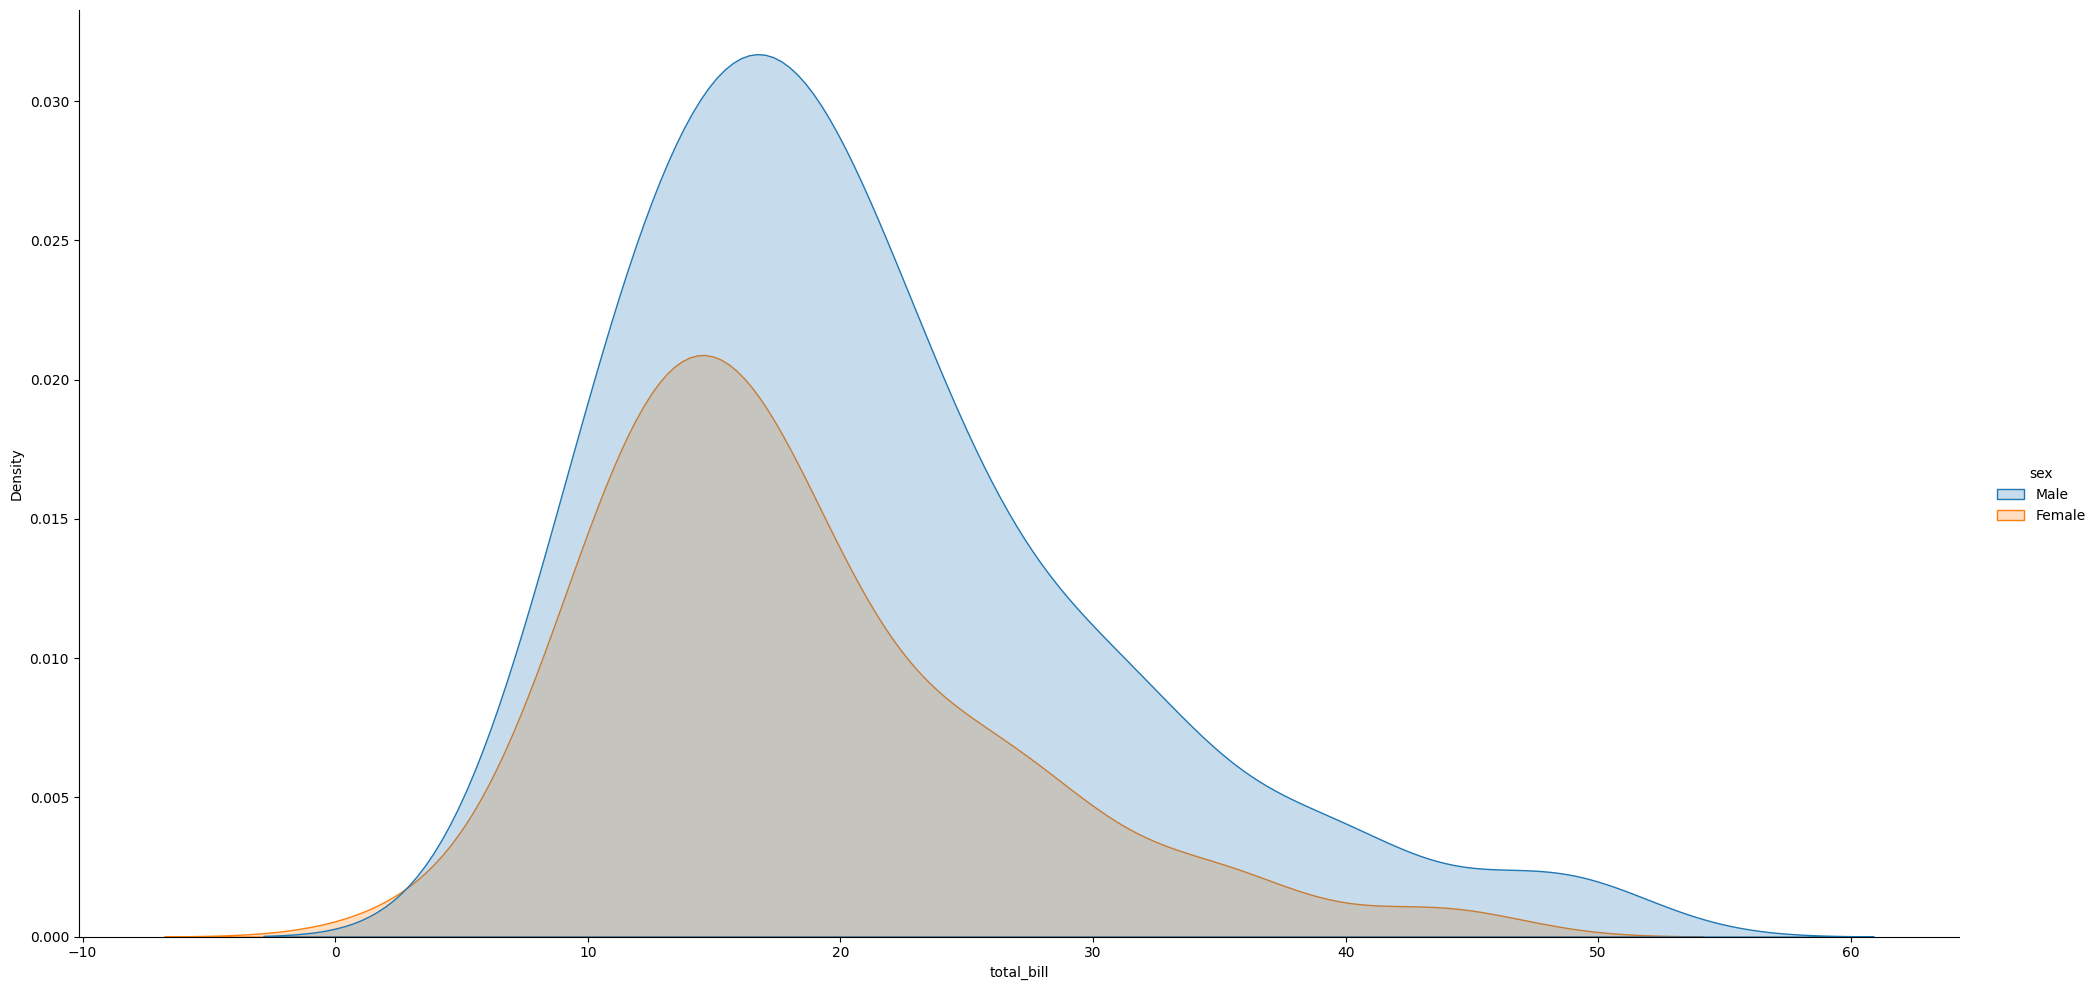

In [82]:
# fill parameter
sns.displot(data=tips, x='total_bill', kind='kde', hue='sex', fill=True, height=10, aspect=2)

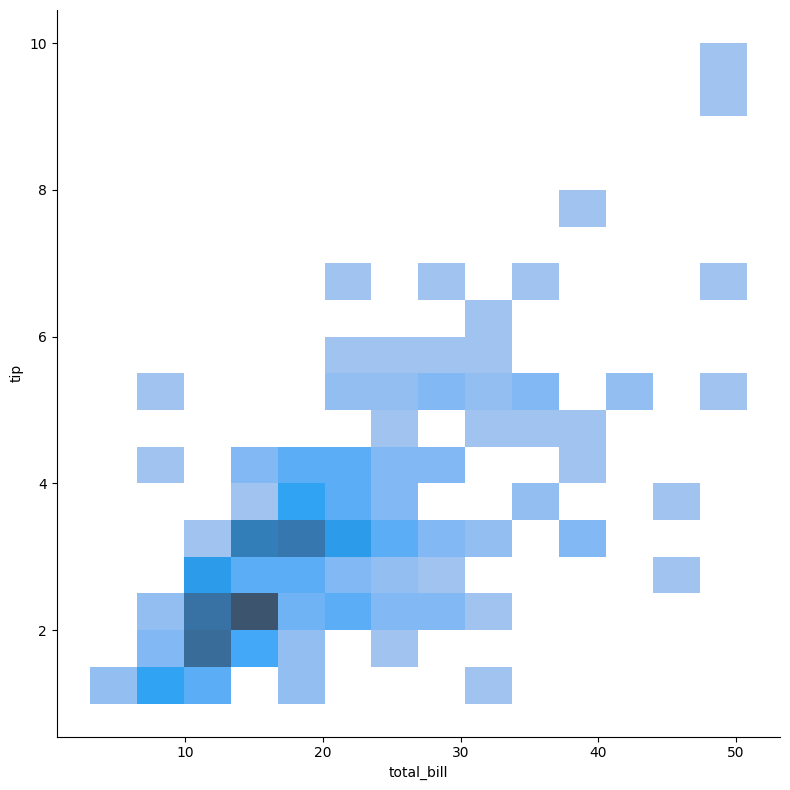

In [88]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot
# and then shows the count of observations within each rectangle with the fill color

# sns.histplot(data=tips, x='total_bill', y='tip')
sns.displot(data=tips, x='total_bill', y='tip',kind='hist', height=8)

# Bivariate KDE
a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian

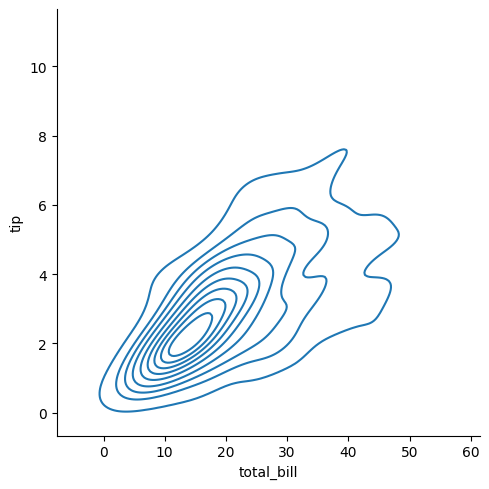

In [89]:
sns.displot(data=tips, x='total_bill', y='tip', kind='kde')

# Heatmap

<Axes: xlabel='year', ylabel='country'>

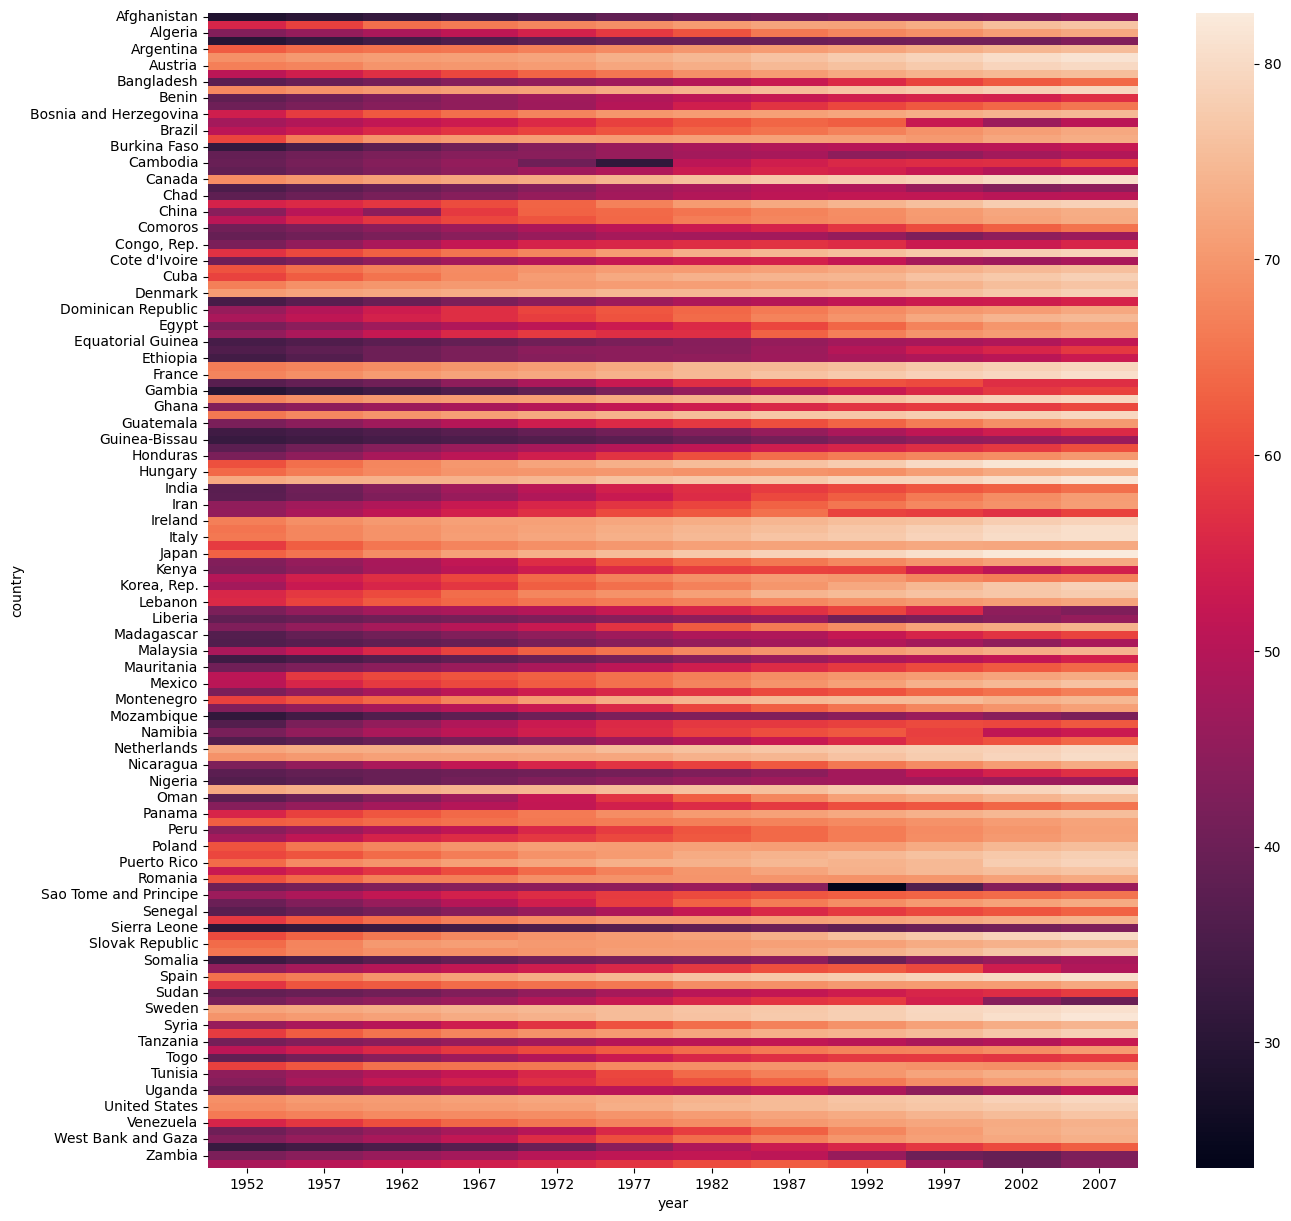

In [97]:
temp_df1 = gap.pivot(index='country', columns='year', values='lifeExp')
# Axes Level Function
plt.figure(figsize=(15,15))
sns.heatmap(temp_df1)

<Axes: xlabel='year', ylabel='country'>

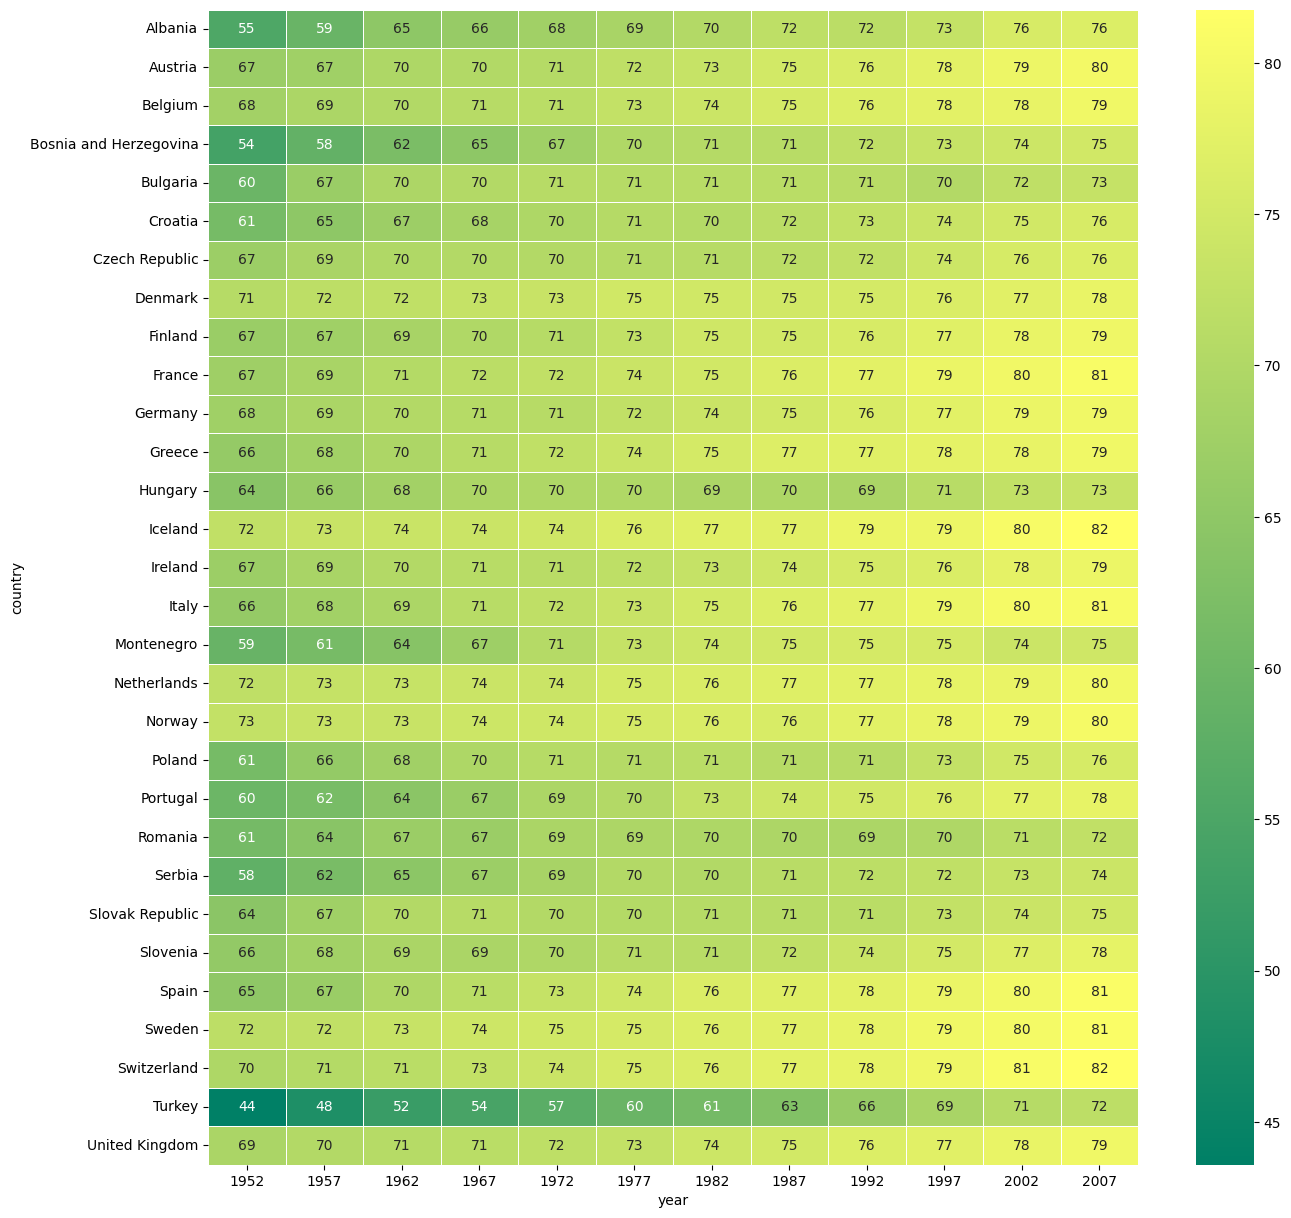

In [105]:
# I want to visualize the wistern lifeExp in each year
# annot
temp_df2 = gap[gap['continent'] == 'Europe'].pivot(index='country', columns='year', values='lifeExp')

plt.figure(figsize=(15,15))

sns.heatmap(temp_df2, annot=True, linewidths=0.5, cmap='summer')